<a href="https://colab.research.google.com/github/sajadkarimii/Meteorological-Data-Analysis-from-OIMM-Station/blob/main/OIMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import category_encoders as ce
from scipy import stats
from sklearn.ensemble import RandomForestRegressor

In [16]:
data = pd.read_csv("/content/drive/MyDrive/OIMM/oimm.csv")

<ipython-input-16-bee9c39667ac>:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,12,14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/OIMM/oimm.csv")


In [17]:
data = data.drop(data.index[0])
data['DATE'] = data['TIME'].apply(lambda x:x.split('/')[0]) # Date separation
data['TIME'] = data['TIME'].apply(lambda x:x.split('/')[1]) # TIME separation
data['DATE'] = pd.to_datetime(data['DATE'], format='%y%m%d') # Change Date column format
data['Month'] = data['DATE'].dt.month # Separating the month from the
data['Year'] = data['DATE'].dt.year # Separating the year from the date
data['TMPC'] = data['TMPC'].fillna(data['TMPC'].mode()[0]).astype(float) # Convert temperature format to float

In [18]:
data

,STN,TIME,ALTM,PALT,TMPC,DWPC,RELH,DRCT,SPED,GUMS,...,LCLD,CLHL,MCLD,CLHM,HCLD,CLHH,WMTR,DATE,Month,Year
1,OIMM,1340,1016.9,904.2,2.0,2,100,180,4.1,NaN,...,OVC,6000,NaN,NaN,NaN,NaN,-RA,1998-02-09,2,1998
2,OIMM,0900,1002,891,27.0,7,28,100,7.2,NaN,...,BKN,3000,NaN,NaN,NaN,NaN,NaN,1998-05-30,5,1998
3,OIMM,1000,1004.1,892.8,20.0,11,56,110,2.1,NaN,...,BKN,3000,NaN,NaN,NaN,NaN,TS,1998-05-30,5,1998
4,OIMM,1100,1005.1,893.7,19.0,15,78,180,9.8,NaN,...,BKN,3000,NaN,NaN,NaN,NaN,TS,1998-05-30,5,1998
5,OIMM,1200,1005.1,893.7,18.0,14,77,360,6.2,NaN,...,BKN,3000,NaN,NaN,NaN,NaN,TS,1998-05-30,5,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350476,OIMM,1730,1023,909.6,12.0,2.0,50.0,200.0,3.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-31,10,2024
350477,OIMM,1800,1023,909.6,12.0,2.0,50.0,200.0,2.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-31,10,2024
350478,OIMM,1830,1023,909.6,12.0,2.0,50.0,210.0,3.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-31,10,2024
350479,OIMM,1900,1022,908.7,12.0,2.0,50.0,210.0,2.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-31,10,2024


### Checking the degree of correlation between data

In [36]:
sample = data.copy() # Making a copy of the original dataset for encryption and calculating correlation
sample = sample.drop(columns=['DATE','STN'])

In [39]:
for col in sample[['TIME','LCLD','MCLD','HCLD','WMTR']].columns: # Data encoding
    encoder = LabelEncoder()
    sample[col] = encoder.fit_transform(sample[col])

In [40]:
str_cols = sample.select_dtypes(include=['object']).columns
sample[str_cols] = sample[str_cols].astype(float)

In [41]:
sample.corr() # Correlation numerical value for columns

,TIME,ALTM,PALT,TMPC,DWPC,RELH,DRCT,SPED,GUMS,VSBK,LCLD,CLHL,MCLD,CLHM,HCLD,CLHH,WMTR,Month,Year
TIME,1.000000,-0.031473,-0.031392,-0.014158,-0.022334,-0.012294,0.070049,0.042325,0.283796,0.084834,0.050478,0.023621,0.012259,-0.034681,0.026522,-0.008630,0.041301,0.001590,0.010047
ALTM,-0.031473,1.000000,0.999981,-0.592678,-0.328090,0.399896,-0.075910,-0.172079,0.016011,-0.204344,-0.105943,-0.318204,-0.044029,-0.190165,0.055964,0.032678,-0.149381,0.186352,0.013086
PALT,-0.031392,0.999981,1.000000,-0.592607,-0.327922,0.399900,-0.075724,-0.171835,0.016217,-0.203997,-0.105758,-0.318191,-0.043998,-0.190107,0.056024,0.032658,-0.149242,0.186164,0.014590
TMPC,-0.014158,-0.592678,-0.592607,1.000000,0.421758,-0.767434,0.007349,0.322429,-0.367199,0.427215,0.243852,0.465637,0.186617,0.371205,0.005127,0.002567,0.335301,0.146850,0.036544
DWPC,-0.022334,-0.328090,-0.327922,0.421758,1.000000,0.127065,0.048506,0.122446,0.000048,0.053042,-0.087058,0.121392,-0.056544,0.055028,-0.015800,-0.011896,0.002630,0.022808,0.112179
RELH,-0.012294,0.399896,0.399900,-0.767434,0.127065,1.000000,-0.010117,-0.209981,0.395544,-0.514675,-0.360877,-0.508298,-0.253243,-0.357762,0.008364,0.002936,-0.451685,-0.144653,0.010105
DRCT,0.070049,-0.075910,-0.075724,0.007349,0.048506,-0.010117,1.000000,0.319372,0.328060,0.081843,-0.001384,0.068434,-0.050429,-0.031658,-0.002395,0.012421,0.025466,-0.054489,0.059485
SPED,0.042325,-0.172079,-0.171835,0.322429,0.122446,-0.209981,0.319372,1.000000,0.800410,0.118265,-0.099182,0.086679,-0.050581,-0.007354,-0.021739,0.009392,0.034353,-0.068808,0.105975
GUMS,0.283796,0.016011,0.016217,-0.367199,0.000048,0.395544,0.328060,0.800410,1.000000,-0.214289,-0.219401,-0.091041,-0.088538,-0.213688,-0.043651,0.028716,-0.365104,-0.193609,-0.035564
VSBK,0.084834,-0.204344,-0.203997,0.427215,0.053042,-0.514675,0.081843,0.118265,-0.214289,1.000000,0.359590,0.461611,0.167258,0.231502,0.036398,-0.020040,0.732188,0.015745,0.151606


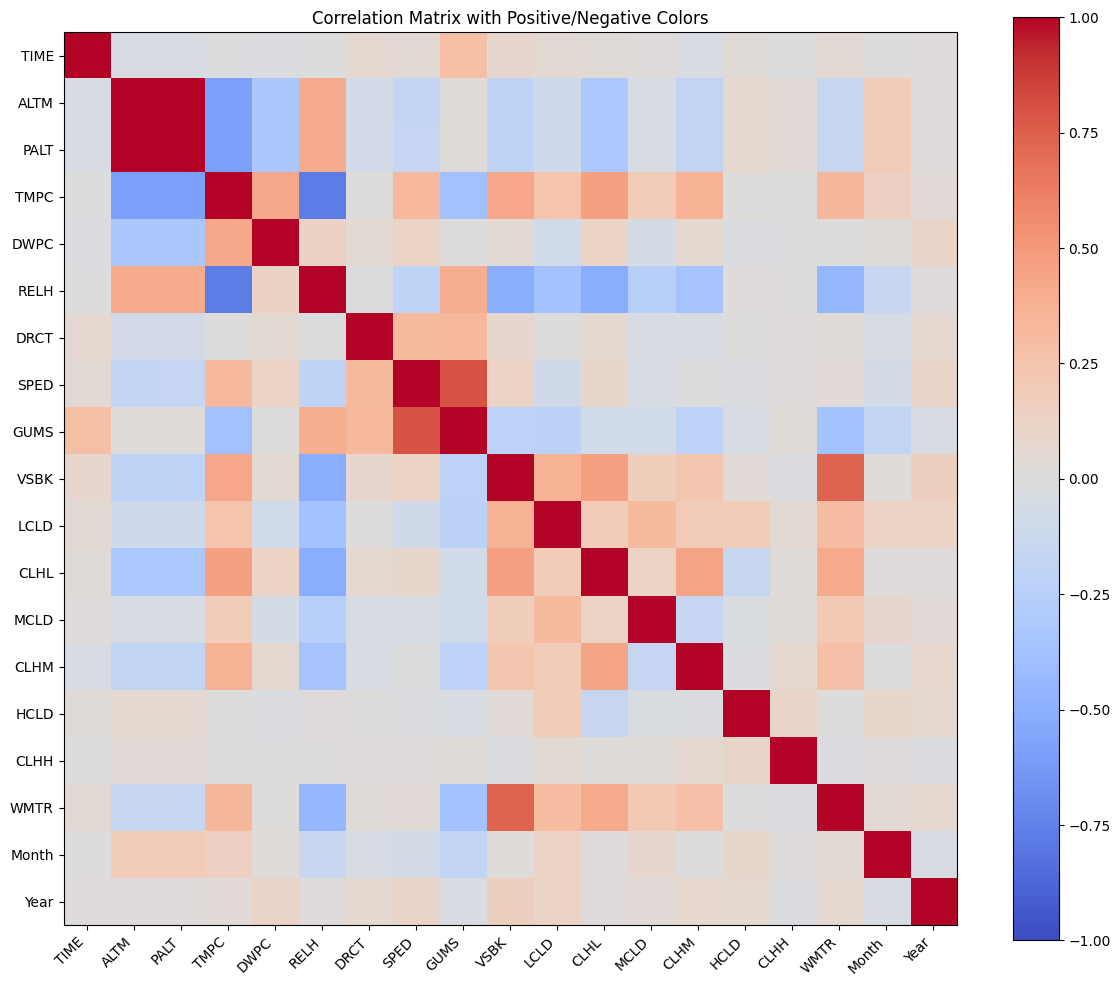

In [42]:
# Correlation Matrix
plt.figure(figsize=(12, 10))

im = plt.imshow(sample.corr(), cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im)

variables = sample.corr().columns.tolist()
plt.xticks(range(len(sample.corr())), variables, rotation=45, ha='right')
plt.yticks(range(len(sample.corr())), variables)

plt.title('Correlation Matrix with Positive/Negative Colors')
plt.tight_layout()
plt.show()


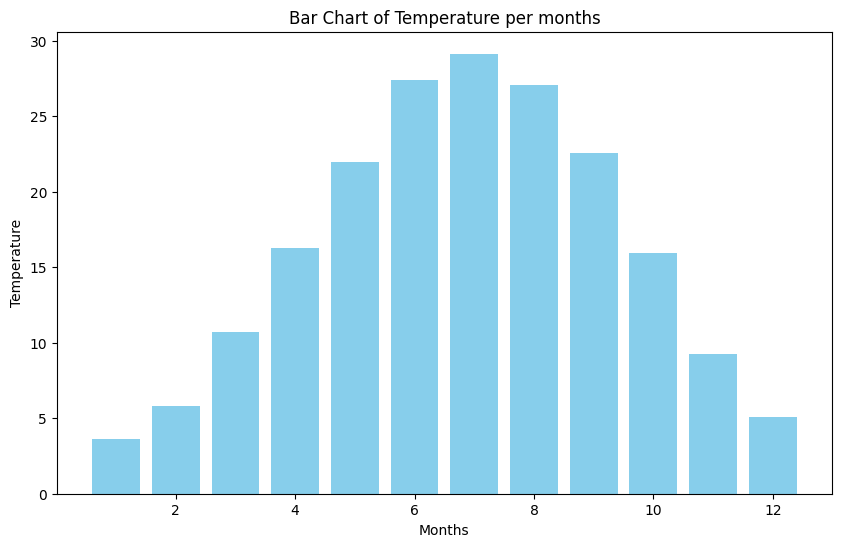

In [46]:
# Average temperature during different months of the year
value_counts = sample[['Month','TMPC']].groupby('Month').mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(value_counts['Month'], value_counts['TMPC'], color='skyblue')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.title('Bar Chart of Temperature per months')
plt.show()

### Seasonal patterns for visibility

In [47]:
data.set_index('DATE', inplace=True)

In [48]:
seasonal_data = data['VSBK'].dropna().astype(float).resample('QE').mean()

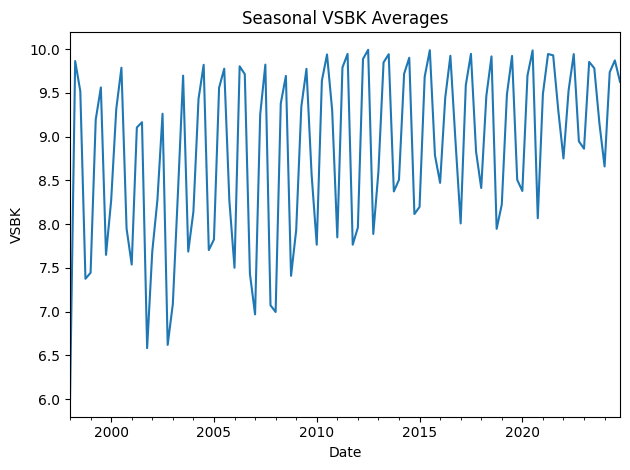

In [49]:
seasonal_data.plot(title='Seasonal VSBK Averages')
plt.xlabel('Date')
plt.ylabel('VSBK')

plt.tight_layout()
plt.show()

### Line plot diagram for two features CLHL and VSBK

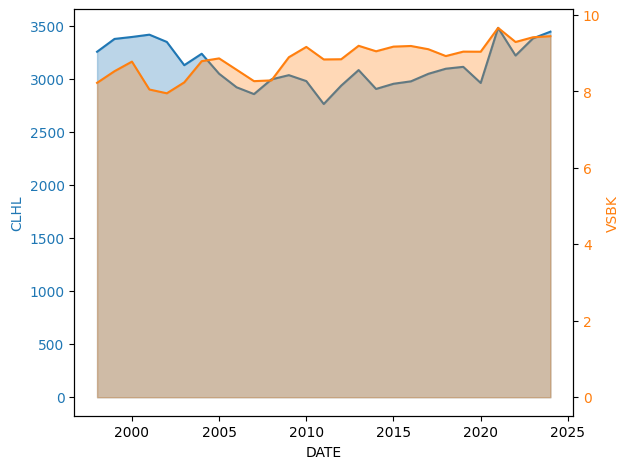

In [50]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('DATE')
ax1.set_ylabel('CLHL', color='tab:blue')
ax1.plot(data['Year'].unique(), data[['Year','CLHL']].astype(float).groupby('Year').mean()['CLHL'], color='tab:blue', label='CLHL')
ax1.fill_between(data['Year'].unique(), data[['Year', 'CLHL']].astype(float).groupby('Year').mean()['CLHL'], color='tab:blue', alpha=0.3)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('VSBK', color='tab:orange')
ax2.plot(data['Year'].unique(), data[['Year','VSBK']].astype(float).groupby('Year').mean()['VSBK'], color='tab:orange', label='VSBK')
ax2.fill_between(data['Year'].unique(), data[['Year', 'VSBK']].astype(float).groupby('Year').mean()['VSBK'], color='tab:orange', alpha=0.3)
ax2.tick_params(axis='y', labelcolor='tab:orange')
fig.tight_layout()
plt.show()

In [51]:
difference = data[['Year', 'CLHL']].astype(float).groupby('Year').mean()['CLHL'] - data[['Year', 'VSBK']].astype(float).groupby('Year').mean()['VSBK']

In [53]:
area = np.trapezoid(difference, data['Year'].unique())

In [54]:
area

np.float64(80837.86255050445)

Two features: visibility and low cloud height are plotted based on the year, and the area under the graph is 80837.

### Complete report of the average and variance of all data broken down by month, year

In [55]:
mean = data[['ALTM','PALT','TMPC','DWPC','RELH','DRCT','SPED','GUMS','VSBK','CLHL','CLHM','CLHH','Year','Month']].astype(float).groupby(['Year','Month']).mean().reset_index()
var = data[['ALTM','PALT','TMPC','DWPC','RELH','DRCT','SPED','GUMS','VSBK','CLHL','CLHM','CLHH','Year','Month']].astype(float).groupby(['Year','Month']).var().reset_index()

In [56]:
summary_df = pd.concat([mean, var], axis=1, keys=['Mean', 'Variance'])

In [57]:
summary_df

Mean                                                                   \
       Year Month         ALTM        PALT       TMPC       DWPC        RELH   
0    1998.0   2.0  1016.900000  904.200000   2.000000   2.000000  100.000000   
1    1998.0   5.0  1008.425926  896.633333  18.703704  13.148148   72.814815   
2    1998.0   6.0  1013.663415  901.287805  27.216867   9.590361   33.867470   
3    1998.0   8.0  1014.231194  901.794652  26.674377   9.446619   35.516014   
4    1998.0   9.0  1016.255825  903.590469  21.847662   7.064955   39.953172   
..      ...   ...          ...         ...        ...        ...         ...   
313  2024.0   6.0  1013.952286  901.560835  27.163022  12.435388   41.807157   
314  2024.0   7.0  1010.745163  898.696398  28.762508  13.957972   41.628419   
315  2024.0   8.0  1013.985026  901.583203  27.767578  12.188151   39.510417   
316  2024.0   9.0  1017.874389  905.040823  21.245639   6.022331   39.115841   
317  2024.0  10.0  1019.614344  906.595873  16.343031   7.556834   58.834912   

                                      ...   Variance                         \
           DRCT      SPED       GUMS  ...       TMPC       DWPC        RELH   
0    180.000000  4.100000        NaN  ...        NaN        NaN         NaN   
1    225.185185  4.270370        NaN  ...  11.293447   2.592593  310.925926   
2    136.385542  3.938554        NaN  ...  20.415810   3.439906   48.091978   
3    158.859180  3.715330        NaN  ...  22.494494   9.784133  132.410617   
4    154.550989  3.065449        NaN  ...  34.491864  18.018467  112.758772   
..          ...       ...        ...  ...        ...        ...         ...   
313  156.474486  3.808217  10.000000  ...  20.365979   8.007261  144.204829   
314  140.213618  3.738559  11.250000  ...  19.633814   6.932144  108.292409   
315  135.923027  3.770573  10.166667  ...  24.987639  14.818648  113.550380   
316  137.857641  3.464410  11.000000  ...  29.633754  15.183859  152.895789   
317  132.550744  2.617388        NaN  ...  40.285094   7.422292  254.285524   

                                                                               \
             DRCT      SPED       GUMS      VSBK           CLHL          CLHM   
0             NaN       NaN        NaN       NaN            NaN           NaN   
1    16533.618234  3.169088        NaN  1.333333  198717.948718  8.333333e+04   
2    16064.825154  7.449715        NaN  0.317367   70135.746606           NaN   
3    11767.624777  5.954300        NaN  0.893838   98320.574163  7.536232e+05   
4     8723.311802  3.829612        NaN  2.003175  110944.338458  0.000000e+00   
..            ...       ...        ...       ...            ...           ...   
313  11734.379488  4.828871   0.000000  0.243824   82808.723383  9.760000e+06   
314   8691.337102  7.463158  10.916667  0.348246  111610.320285  1.114824e+07   
315   6904.059345  4.978208   0.166667  0.820910   87688.172043  1.166256e+07   
316   6902.879161  4.388230   8.000000  0.289893  107420.634921  6.054907e+06   
317   8264.782461  2.942426        NaN  1.231187  851652.705456  7.035643e+06   

                   
             CLHH  
0             NaN  
1    0.000000e+00  
2             NaN  
3    0.000000e+00  
4    2.619048e+05  
..            ...  
313  8.281707e+05  
314  6.666667e+05  
315  2.000000e+06  
316  4.705882e+05  
317  6.920635e+05  

[318 rows x 28 columns]

### Regression model for prediction

In [58]:
encoder = ce.TargetEncoder()

In [59]:
data['TIME'] = pd.to_datetime(data['TIME'].apply(lambda x: f"{x[:2]}:{x[2:]}"), format='%H:%M').dt.time

In [60]:
data[['STN','TIME','LCLD','MCLD','HCLD','WMTR']] = encoder.fit_transform(data[['STN','TIME','LCLD','MCLD','HCLD','WMTR']] ,data['TMPC'] )

In [61]:
data[data.select_dtypes(include=['object']).columns] = data[data.select_dtypes(include=['object']).columns].astype(float)

In [62]:
data.corr()['TMPC']

,TMPC
STN,NaN
TIME,0.349856
ALTM,-0.592678
PALT,-0.592607
TMPC,1.000000
DWPC,0.421758
RELH,-0.767434
DRCT,0.007349
SPED,0.322429
GUMS,-0.367199


Best features: RELH, DWPC, ALTM, CLHL, VSBK, WMTR, LCLD, SPED, GUMS, MCLD, CLHM, TIME

In [63]:
x_train = data[['RELH' , 'DWPC' , 'ALTM' , 'CLHL' , 'VSBK' , 'WMTR' , 'LCLD' , 'SPED' , 'GUMS' , 'MCLD' , 'CLHM','TIME']][~((data['Year'] == 2024) & (data['Month'] == 10))]

In [64]:
y_train = data['TMPC'][~((data['Year'] == 2024) & (data['Month'] == 10))]

In [65]:
x_test = data[['RELH' , 'DWPC' , 'ALTM' , 'CLHL' , 'VSBK' , 'WMTR' , 'LCLD' , 'SPED' , 'GUMS' , 'MCLD' , 'CLHM','TIME']][(data['Year'] == 2024) & (data['Month'] == 10)]

In [66]:
y_test = data['TMPC'][(data['Year'] == 2024) & (data['Month'] == 10)]

In [67]:
model = RandomForestRegressor().fit(x_train,y_train)

In [68]:
model.score(x_train,y_train)

0.9997183260112608

In [69]:
model.score(x_test,y_test)

0.9999944868884169

### Relationship between wind speed and cloud height

In [70]:
# Correlation of wind speed with cloud height
data[['SPED','CLHL','CLHM','CLHH']].astype(float).corr()['SPED']

,SPED
SPED,1.000000
CLHL,0.086679
CLHM,-0.007354
CLHH,0.009392


In [71]:
# Correlation of wind speed with average cloud height
np.corrcoef(data.dropna(subset=['SPED', 'CLHL', 'CLHM', 'CLHH'])['SPED'].astype(float),data.dropna(subset=['SPED', 'CLHL', 'CLHM', 'CLHH'])[['CLHL','CLHM','CLHH']].astype(float).mean(axis=1))

array([[ 1.        , -0.02023584],
       [-0.02023584,  1.        ]])

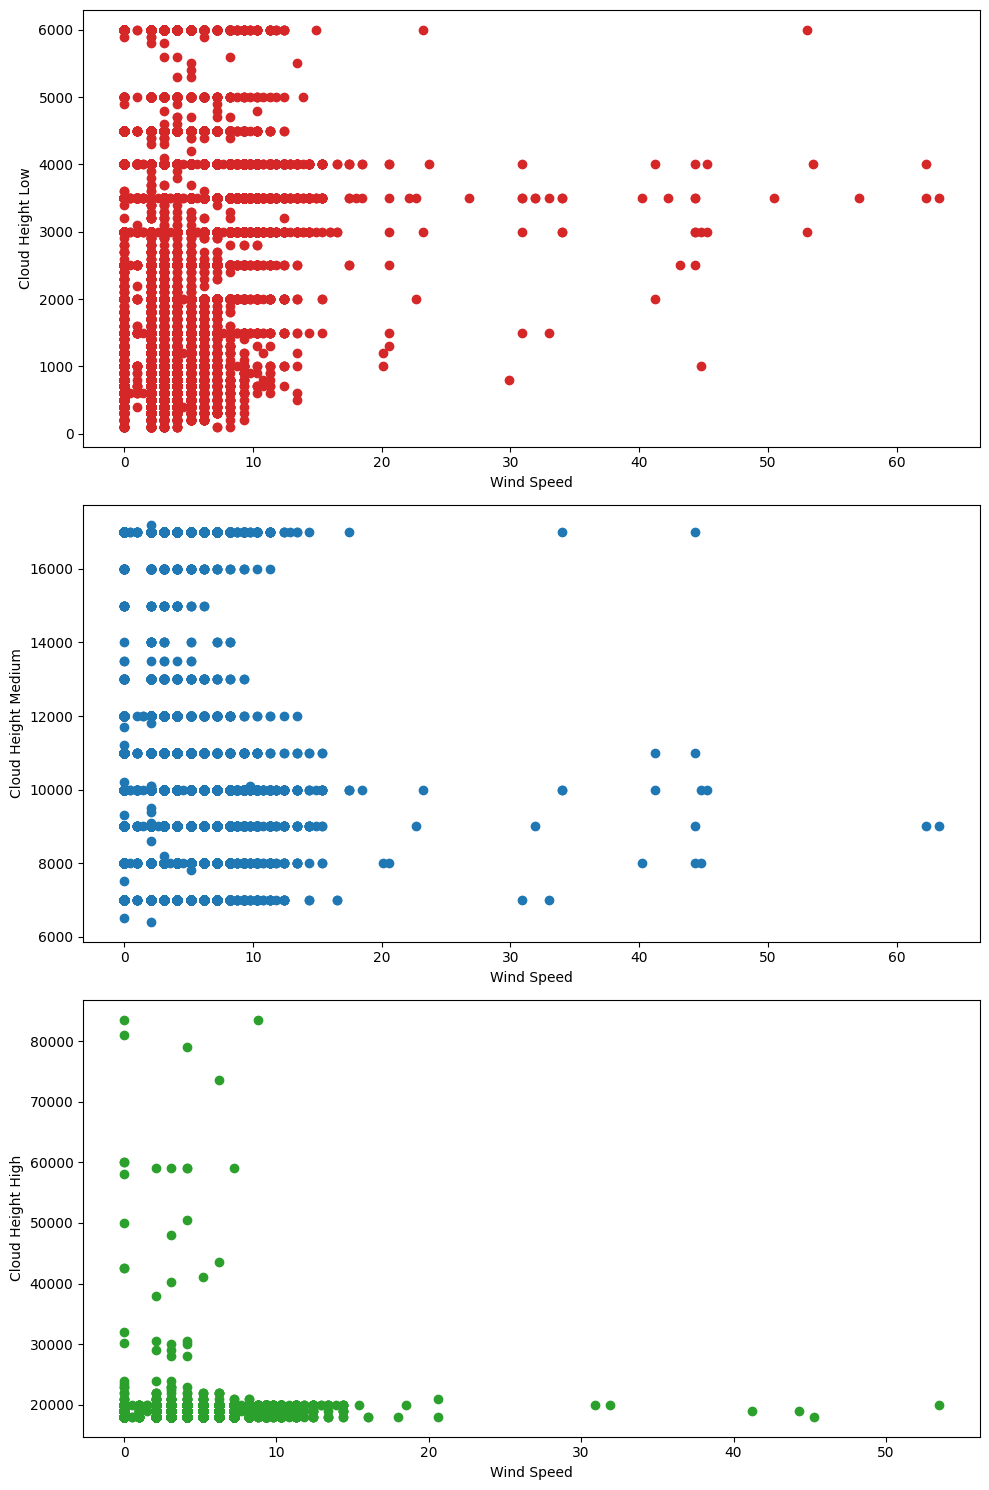

In [72]:
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(10, 15))
ax1.scatter(data['SPED'].astype(float), data['CLHL'].astype(float), color='tab:red')
ax1.set_xlabel('Wind Speed')
ax1.set_ylabel('Cloud Height Low')

ax2.scatter(data['SPED'].astype(float), data['CLHM'].astype(float), color='tab:blue')
ax2.set_xlabel('Wind Speed')
ax2.set_ylabel('Cloud Height Medium')

ax3.scatter(data['SPED'].astype(float), data['CLHH'].astype(float), color='tab:green')
ax3.set_xlabel('Wind Speed')
ax3.set_ylabel('Cloud Height High')

plt.tight_layout()
plt.show()

From the above plots and the correlation values ​​of wind speed with cloud height, it can be concluded that wind speed has very little correlation with cloud height (this correlation is slightly higher at lower cloud heights).

### Average annual maximum temperature

In [73]:
yearAvg = data[['Year','TMPC']].groupby('Year').mean().reset_index()

In [74]:
max = yearAvg.loc[yearAvg['TMPC'].idxmax()]

In [75]:
max

,26
Year,2024.000000
TMPC,18.081224


The highest average temperature is from 2024 and its value is 18.08.

In [76]:
group_a = yearAvg[yearAvg['Year'] == max['Year']]['TMPC']
group_b = yearAvg[yearAvg['Year'] != max['Year']]['TMPC']

In [77]:
t_stat, p_value = stats.ttest_ind(group_a,group_b)

In [78]:
print(f"Max Average Temperature Year: {max['Year']}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

Max Average Temperature Year: 2024.0
T-statistic: 2.9878484730197328
P-value: 0.006216946387671344


From this test, it can be concluded that due to the low P-value and high T-statistic, there is a significant difference between the means and the probability of it being random is very low.

In [79]:
yearAvg23 = data[['Year','TMPC']][data['Year']!=2024].groupby('Year').mean().reset_index()

In [80]:
max23 = yearAvg23.loc[yearAvg23['TMPC'].idxmax()]

In [81]:
max23

,12
Year,2010.000000
TMPC,17.641292


Due to the incomplete data for the entire year 2024, we ignored the year 2024 in this section, and the highest temperature belongs to the year 2010 and its value is 17.64

In [82]:
group_a23 = yearAvg23[yearAvg23['Year'] == max23['Year']]['TMPC']
group_b23 = yearAvg23[yearAvg23['Year'] != max23['Year']]['TMPC']

In [83]:
t_stat23, p_value23 = stats.ttest_ind(group_a23,group_b23)

In [84]:
print(f"Max Average Temperature Year: {max23['Year']}")
print(f"T-statistic: {t_stat23}")
print(f"P-value: {p_value23}")

Max Average Temperature Year: 2010.0
T-statistic: 2.6768568843567624
P-value: 0.013187107079719337


From this test, it can be concluded that due to the low P-value and high T-statistic, there is a significant difference between the means and the probability of it being random is very low.